In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0, 9.99, 100)

In [3]:
y = np.floor(x)

In [4]:
indices = np.arange(x.shape[0])
np.random.shuffle(indices)

# 두 배열을 동일한 인덱스로 섞기
x_shuffeld = x[indices]
y_shuffeld = y[indices]

In [5]:
x_sorted =  np.unique(x_shuffeld)

In [6]:
averages = [(x_sorted[:-1] + x_sorted[1:]) / 2]

In [7]:
def averages_maker (X):
    averages =[]
    for i in range(X.shape[1]):
        x_shuffeld = X[:, i]
        x_sorted = np.unique(x_shuffeld)
        averages.append((x_sorted[:-1] + x_sorted[1:]) / 2)
    return averages

In [8]:
X = x_shuffeld.reshape(-1,1)

In [9]:
averages = averages_maker(X)
averages

[array([0.05045455, 0.15136364, 0.25227273, 0.35318182, 0.45409091,
        0.555     , 0.65590909, 0.75681818, 0.85772727, 0.95863636,
        1.05954545, 1.16045455, 1.26136364, 1.36227273, 1.46318182,
        1.56409091, 1.665     , 1.76590909, 1.86681818, 1.96772727,
        2.06863636, 2.16954545, 2.27045455, 2.37136364, 2.47227273,
        2.57318182, 2.67409091, 2.775     , 2.87590909, 2.97681818,
        3.07772727, 3.17863636, 3.27954545, 3.38045455, 3.48136364,
        3.58227273, 3.68318182, 3.78409091, 3.885     , 3.98590909,
        4.08681818, 4.18772727, 4.28863636, 4.38954545, 4.49045455,
        4.59136364, 4.69227273, 4.79318182, 4.89409091, 4.995     ,
        5.09590909, 5.19681818, 5.29772727, 5.39863636, 5.49954545,
        5.60045455, 5.70136364, 5.80227273, 5.90318182, 6.00409091,
        6.105     , 6.20590909, 6.30681818, 6.40772727, 6.50863636,
        6.60954545, 6.71045455, 6.81136364, 6.91227273, 7.01318182,
        7.11409091, 7.215     , 7.31590909, 7.41

In [10]:
y = y_shuffeld

In [11]:
feature_num = 0
value = 5

large_y =  y[X[:,feature_num] > value]
small_y =  y[X[:,feature_num] <= value]

unique_y = np.unique(y)

large_y.shape[0]

50

In [12]:
sum_n = 0
cur_y = large_y
unique_y = np.unique(cur_y)

for i in unique_y:
    sum_n += ((cur_y == i).sum() / cur_y.shape[0])**2
gini = 1 - sum_n
print(gini)

0.7999999999999999


In [13]:
sum_n = 0
cur_y = small_y
unique_y = np.unique(cur_y)

for i in unique_y:
    sum_n += ((cur_y == i).sum() / cur_y.shape[0])**2
gini = 1 - sum_n
print(gini)

0.7999999999999999


In [14]:
def gini(cur_y):
    sum = 0
    unique_y = np.unique(cur_y)

    for i in unique_y:
        sum += ((cur_y == i).sum() / cur_y.shape[0])**2
    gini = 1 - sum
    return gini

In [15]:
gini(small_y)

0.7999999999999999

In [16]:
def ginicalc(X, y, feature_num, averages):
    def gini(cur_y):
        sum = 0
        unique_y = np.unique(cur_y)

        for i in unique_y:
            sum += ((cur_y == i).sum() / cur_y.shape[0])**2
        gini = 1 - sum
        return gini
    ginies = []
    for value in averages[feature_num]:
        feature_num = 0

        large_y =  y[X[:, feature_num] > value]
        small_y =  y[X[:, feature_num] <= value]

        ginies.append(gini(large_y) + gini(small_y))
    return sorted(ginies)[0], value

In [17]:
import numpy as np

def ginicalc(X, y, feature_num, averages):
    def gini(cur_y):
        _, counts = np.unique(cur_y, return_counts=True)
        probabilities = counts / len(cur_y)
        return 1 - np.sum(probabilities**2)
    
    best_gini = np.inf  # 최소 Gini 값을 초기화
    best_value = None   # 최적 분할값
    best_mask = None    # 최적 분할 마스크

    for value in averages[feature_num]:
        # 분할 조건에 따른 마스크 계산
        mask = X[:, feature_num] > value
        large_y = y[mask]
        small_y = y[~mask]

        # 현재 Gini 값 계산
        gini_value = gini(large_y) + gini(small_y)

        # 최적 Gini 값과 비교하여 업데이트
        if gini_value < best_gini:
            best_gini = gini_value
            best_value = value
            best_mask = mask

    return best_value, best_gini, best_mask


In [18]:
def gini(cur_y):
    _, counts = np.unique(cur_y, return_counts=True)  
    probabilities = counts / len(cur_y)
    return 1 - np.sum(probabilities**2)

best_gini = (np.inf, 0, -1)

for feature_num in range(X.shape[1]):
    cur_gini = ginicalc(X, y, feature_num, averages)
    if cur_gini[0] < best_gini[0]:
        best_gini = cur_gini




In [77]:
class Node:
    def __init__(self, X = None, y = None, mask = None, feature_num = None, value = None, gini = None, result = None, depth = None, branches = None):
        self.X = X,  
        self.y= y,
        self.feature_num = feature_num,
        self.value = value
        self.mask = mask
        self.gini = gini
        self.result = result
        self.depth = depth
        self.branches = branches


In [58]:
def averages_maker (X):
    averages =[]
    for i in range(X.shape[1]):
        x_shuffeld = X[:, i]
        x_sorted = np.unique(x_shuffeld)
        averages.append((x_sorted[:-1] + x_sorted[1:]) / 2)
    return averages

In [59]:
def gini(cur_y):
    _, counts = np.unique(cur_y, return_counts=True)  
    probabilities = counts / len(cur_y)
    return 1 - np.sum(probabilities**2)

In [60]:
def ginicalc(X, y, feature_num, averages):
    
    best_gini = np.inf  # 최소 Gini 값을 초기화
    best_value = None   # 최적 분할값
    best_mask = None    # 최적 분할 마스크

    for value in averages[feature_num]:
        # 분할 조건에 따른 마스크 계산
        mask = X[:, feature_num] > value
        large_y = y[mask]
        small_y = y[~mask]

        # 현재 Gini 값 계산
        large_gini = gini(large_y)
        small_gini = gini(small_y)
        gini_value =  large_gini + small_gini

        # 최적 Gini 값과 비교하여 업데이트
        if gini_value < best_gini:
            best_gini = gini_value
            best_value = value
            best_mask = mask

    return best_value, best_gini, best_mask

In [ ]:
# def ginicalc(X, y, feature_num, averages):
    
#     best_gini = np.inf  # 최소 Gini 값을 초기화
#     best_value = None   # 최적 분할값
#     best_mask = None    # 최적 분할 마스크

#     cur_large_gini = -1
#     cur_small_gini = -1
#     for value in averages[feature_num]:
#         # 분할 조건에 따른 마스크 계산
#         mask = X[:, feature_num] > value
#         large_y = y[mask]
#         small_y = y[~mask]

#         # 현재 Gini 값 계산
#         large_gini = gini(large_y)
#         small_gini = gini(small_y)
#         gini_value =  large_gini + small_gini

#         # 최적 Gini 값과 비교하여 업데이트
#         if gini_value < best_gini:
#             best_gini = gini_value
#             best_value = value
#             best_mask = mask
#             cur_large_gini = large_gini
#             cur_small_gini = small_gini

#     return best_value, best_gini, best_mask, cur_large_gini, cur_small_gini

In [87]:
max_depth = 7
def Decision_tree(X, y, depth = 0, gini_index = None):

    if gini_index == None :
        gini_index = gini(y)

    if gini_index == 0 or depth == max_depth:
        return [Node(result = y[0], depth=depth, gini=gini_index, branches=0)]

    averages = averages_maker(X)

    best_gini = np.inf
    best_value = None
    best_mask = []
    true_nodes = []
    false_nodes = []
    best_feature = -1

    for feature_num in range(X.shape[1]):
        cur_gini = ginicalc(X, y, feature_num, averages)
        if cur_gini[1] < best_gini:
            best_value, best_gini, best_mask = cur_gini

    true_nodes  +=  Decision_tree(X[best_mask], y[best_mask], depth= depth+1)
    false_nodes += Decision_tree(X[~best_mask], y[~best_mask], depth= depth+1)



    result_nodes = true_nodes + false_nodes

    branches = len(false_nodes)
    result_nodes.append(Node(X=X, y=y, mask=best_mask, feature_num=best_feature, value=best_value, depth=depth, gini=gini_index, branches=branches))
    
    return result_nodes


In [88]:
start =time.time()
myDecision =  Decision_tree(X,y)
end = time.time()

print(end - start)

0.039141178131103516


In [89]:
myDecision

In [90]:
for i in myDecision:
    print(i.depth, i.value if i.value != None else i.result, i.gini, i.branches)

7 7.0 0.6666666666666667 0
7 6.0 0.0 0
6 7.013181818181819 0.75 1
6 5.0 0.0 0
5 6.004090909090909 0.7999999999999999 1
5 4.0 0.0 0
4 4.994999999999999 0.8333333333333333 1
4 3.0 0.0 0
3 3.985909090909091 0.8571428571428572 1
3 2.0 0.0 0
2 2.9768181818181816 0.875 1
2 1.0 0.0 0
1 1.9677272727272728 0.8888888888888888 1
1 0.0 0.0 0
0 0.9586363636363636 0.8999999999999999 1


In [48]:
myDecision_true = myDecision[::-1]

In [52]:
for i in myDecision_true:
    print(i.value)

0.9586363636363636
None
1.9677272727272728
None
2.9768181818181816
None
3.985909090909091
None
4.994999999999999
None
6.004090909090909
None
7.013181818181819
None
8.022272727272727
None
9.031363636363636
None
None


In [51]:
ginicalc(X, y, 0, averages)

(0.9586363636363636,
 0.8888888888888888,
 array([ True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True]))

In [172]:
start = time.time()
for feature_num in range(X.shape[1]):
    ginicalc(X, y, feature_num, averages)
end = time.time()
print(end-start)

0.009599924087524414


In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [133]:
dtc = DecisionTreeClassifier()

In [45]:
scaled_x =  X[0].reshape(-1,1)

In [134]:
start = time.time()
dtc.fit(scaled_x,y)
end = time.time()

print(end-start)

0.0026149749755859375


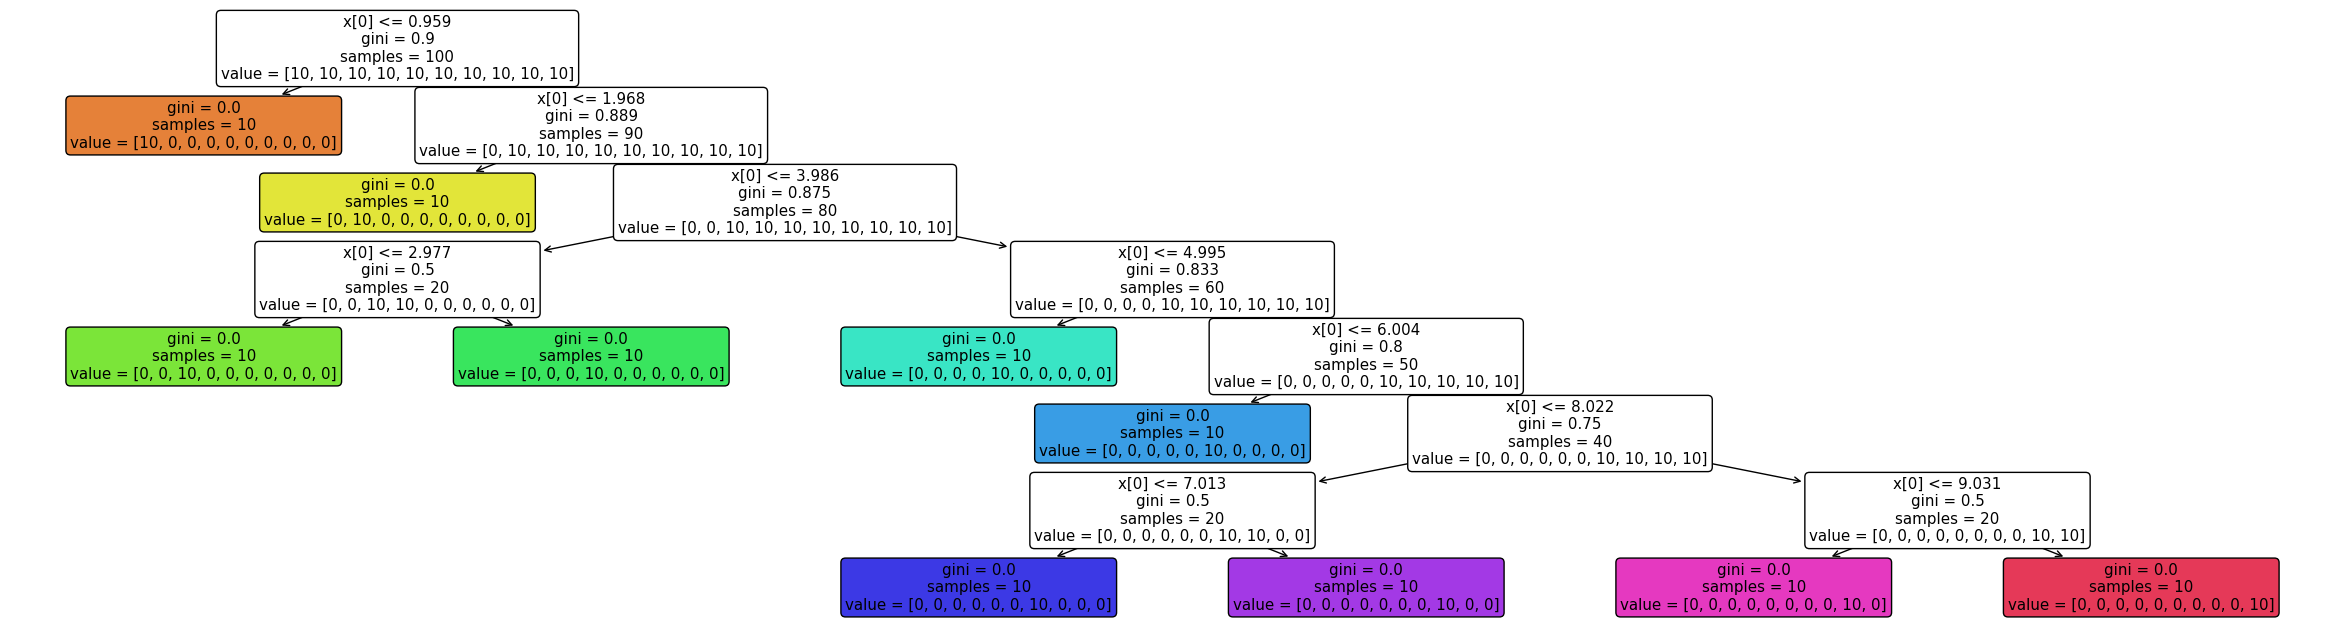

In [89]:
# 트리 시각화
plt.figure(figsize=(30, 8))  # 그림 크기 조정
plot_tree(dtc, 
        #   feature_names=X.astype(str),  # 특징 이름
        #   class_names=y.astype(str),    # 클래스 이름
          filled=True,                      # 노드 색칠
          rounded=True)                     # 둥근 노드
plt.show()